In [1]:
import scipy
import numpy as np
from sklearn.metrics import pairwise_distances
import networkx as nx
import pandas as pd
from ripser import Rips
import matplotlib.pyplot as plt

In [2]:
np.random.seed(10)
POINTS_ARRAY = np.random.randint(1, 15, size = (6,3))
POINTS_ARRAY

array([[10, 14,  5],
       [ 1,  2, 12],
       [13, 10, 14],
       [ 1, 14,  2],
       [11,  9, 10],
       [ 1, 11,  9]])

In [3]:
distance_matrix = pairwise_distances(POINTS_ARRAY).round(2)
distance_matrix

array([[ 0.  , 16.55, 10.3 ,  9.49,  7.14, 10.3 ],
       [16.55,  0.  , 14.56, 15.62, 12.37,  9.49],
       [10.3 , 14.56,  0.  , 17.44,  4.58, 13.04],
       [ 9.49, 15.62, 17.44,  0.  , 13.75,  7.62],
       [ 7.14, 12.37,  4.58, 13.75,  0.  , 10.25],
       [10.3 ,  9.49, 13.04,  7.62, 10.25,  0.  ]])

In [4]:
mst = scipy.sparse.csgraph.minimum_spanning_tree(distance_matrix)
print(mst)

  (0, 4)	7.14
  (1, 5)	9.49
  (2, 4)	4.58
  (3, 0)	9.49
  (3, 5)	7.62


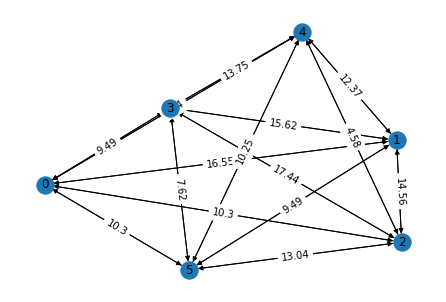

In [5]:
G = nx.from_numpy_matrix(distance_matrix, create_using=nx.DiGraph)
layout = nx.spring_layout(G)
nx.draw(G, layout, with_labels = True)
labels = nx.get_edge_attributes(G, "weight")
_ = nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)

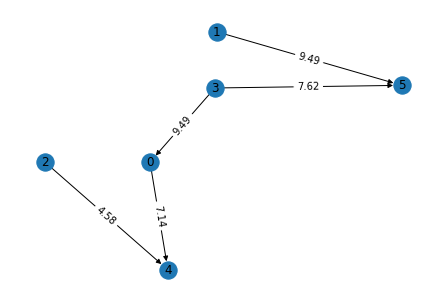

In [6]:
G = nx.from_numpy_matrix(mst.toarray(), create_using=nx.DiGraph)
layout = nx.spring_layout(G)
nx.draw(G, layout, with_labels = True)
labels = nx.get_edge_attributes(G, "weight")
_ = nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)

In [13]:
mst_cords = mst.tocoo()
mst_df = pd.DataFrame({'src':mst_cords.row, 'dst':mst_cords.col, 'dist':mst_cords.data})
mst_df = mst_df.sort_values(by='dist').reset_index(drop = True)
mst_df.iloc[4,0] = 0
mst_df.iloc[4,1] = 3
mst_df

,src,dst,dist
0,2,4,4.58
1,0,4,7.14
2,3,5,7.62
3,1,5,9.49
4,0,3,9.49


In [12]:
class Component:
    def __init__(self, vertices, polygon):
        self.vertices = vertices
        self.polygon = polygon

In [ ]:
class NaiveDisjoinSet:
    def __init__(self, n_points):
        self.universal = [Component({i}, [(0,0), (0,0)]) for i in range(n_points)]
    def Find(self, a):
        for ele in self.universal:
            if a in ele.vertices:
                return ele
        raise Exception("Element Not Found")
    def Union(self, a, b, merged_hull):
        s1 = self.Find(a)
        s2 = self.Find(b)
        if s1.vertices == s2.vertices:
            raise Exception("Elements belong to same set")
        s3 = s1.vertices.union(s2.vertices)
        nc = Component(s3, merged_hull)
        self.universal.remove(s1)
        self.universal.remove(s2)
        self.universal.append(nc)
        
        
        
# nd = NaiveDisjoinSet(5)
# print(nd.universal[0].vertices)
# nd.Find(4).vertices
# nd.Union(1, 2, [(0,0), (0,1), (0,0)])
# nd.Find(2)
# nd.Union(3, 1)
# nd.Find(1)
# nd.Find(2)
# nd.Find(4)
# nd.Find(2)